In [ ]:
import requests
import json

# Mercury Format Test

In [ ]:
response = requests.post(
    'https://api.inceptionlabs.ai/v1/chat/completions',
    headers={
        'Content-Type': 'application/json',
        'Authorization': 'xxx'
    },
    json={
        'model': 'mercury-coder-small',
        'messages': [
            {'role': 'user', 'content': 'What is a diffusion model?'}
        ],
        'max_tokens': 100
    }
)

data = response.json()

In [ ]:
df = json.dumps(data)
df = json.loads(df)

In [ ]:
df['choices'][0]['message']['content']

'A diffusion model is a type of generative model that uses a diffusion process to generate data. In a diffusion process, data points are generated by starting from a simple distribution (such as a Gaussian) and gradually transforming it into a more complex distribution that matches the data. This transformation is typically done using a neural network that learns to map the simple distribution to the complex distribution. Diffusion models have been used for a variety of tasks, including image generation, text generation, and speech synthesis.'

# ARC Prompt Formatting

In [ ]:
with open('/content/f0afb749.json', 'r') as f:
    data = json.load(f)

In [ ]:
train = data['train']
test = data['test']
test_input = test[0]['input']
test_output = test[0]['output']

In [ ]:
examples = ""
for item in train:
    input = json.dumps(item['input'])
    output = json.dumps(item['output'])
    examples += f"Input: {input}\nOutput: {output}\n\n"

print(examples)

Input: [[0, 0, 0, 5, 0], [0, 5, 0, 0, 0], [0, 0, 0, 0, 0], [0, 5, 0, 0, 0], [0, 0, 0, 0, 0]]
Output: [[1, 0, 0, 0, 0, 0, 5, 5, 0, 0], [0, 1, 0, 0, 0, 0, 5, 5, 0, 0], [0, 0, 5, 5, 0, 0, 0, 0, 1, 0], [0, 0, 5, 5, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 5, 5, 0, 0, 1, 0, 0, 0], [0, 0, 5, 5, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1]]

Input: [[2, 0], [0, 0]]
Output: [[2, 2, 0, 0], [2, 2, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]

Input: [[0, 0, 0, 0, 0, 3], [0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
Output: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0

Prompt #1

In [ ]:
prompt1 = f"""You are given a set of input-output grid pairs that define a transformation rule. Each grid is a 2D array of integers, where each integer represents a color. Your task is to learn the transformation and apply it to a new input grid.

Each example below consists of an 'input' grid and its corresponding 'output' grid. Analyze the patterns and apply the inferred transformation rule to the final test input.

You must determine the correct size of the output grid based on the transformation logic. However, the output grid must not exceed 30 rows or 30 columns in size.

Training Examples:
{examples}
Test Input:
{test_input}

What should be the Output grid? Only provide the output grid as your answer."""

In [ ]:
print(prompt1)

You are given a set of input-output grid pairs that define a transformation rule. Each grid is a 2D array of integers, where each integer represents a color. Your task is to learn the transformation and apply it to a new input grid.

Each example below consists of an 'input' grid and its corresponding 'output' grid. Analyze the patterns and apply the inferred transformation rule to the final test input.

You must determine the correct size of the output grid based on the transformation logic. However, the output grid must not exceed 30 rows or 30 columns in size.

Training Examples:
Input: [[2, 0, 4, 0, 8, 0], [0, 3, 0, 8, 8, 8], [0, 0, 0, 0, 8, 0]]
Output: [[0, 2, 0, 0, 0, 0, 0, 4, 0], [2, 2, 2, 0, 0, 0, 4, 4, 4], [0, 2, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 3, 3, 3, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]

Input: [[0, 0, 8, 0, 4, 0], [8, 0, 0, 1, 2, 4], [8, 8, 0, 0, 1, 0]]
Out

Prompt #2

In [ ]:
prompt2 = f"""You are an expert at solving ARC grid transformation tasks.
Given a set of input-output grid pairs, your goal is to:
1. Analyze the transformations and infer the underlying abstract rule.
2. Describe the rule in natural language.
3. Write a Python function that implements this rule.

Here are the grids (as ASCII and as lists of lists), with differences highlighted:

Training Examples:
{examples}
Test Input:
{test_input}

Please:
- State the rule you infer.
- Write the Python function `solve(input_grid)` that transforms the test input according to your rule.
"""

In [ ]:
print(prompt2)

You are an expert at solving ARC grid transformation tasks.
Given a set of input-output grid pairs, your goal is to:
1. Analyze the transformations and infer the underlying abstract rule.
2. Describe the rule in natural language.
3. Write a Python function that implements this rule.

Here are the grids (as ASCII and as lists of lists), with differences highlighted:

Training Examples:
Input: [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3, 0, 3, 0, 0], [0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0]]
Output: [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3, 4, 3, 0, 0], [0, 0, 3, 4, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0]]

Input: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 3, 0, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Output: [[0, 0, 0, 0, 0, 0

# Prompt #3

In [ ]:
prompt3 = f"""You are given a set of input-output grid pairs that define a transformation rule. Each grid is a 2D array of integers, where each integer represents a color. Your task is to learn the transformation pattern from the examples and apply it to a new input grid.

Each example consists of an 'input' grid and its corresponding 'output' grid. Analyze the examples carefully and identify the underlying transformation logic.

Let's think step by step:
1. For each training example, describe how the input grid is transformed into the output grid.
2. Summarize the consistent transformation rule based on these observations.
3. Apply this rule to the test input grid to generate the output.

You must determine the correct size of the output grid based on the transformation logic. However, the output grid must not exceed 30 rows or 30 columns.

Training Examples:
{examples}
Test Input:
{test_input}

First, explain your reasoning.
Then, provide the final output using this format:

Final Output Grid:
<your 2D output grid here>"""

In [ ]:
print(prompt3)

You are given a set of input-output grid pairs that define a transformation rule. Each grid is a 2D array of integers, where each integer represents a color. Your task is to learn the transformation pattern from the examples and apply it to a new input grid.

Each example consists of an 'input' grid and its corresponding 'output' grid. Analyze the examples carefully and identify the underlying transformation logic.

Let's think step by step:
1. For each training example, describe how the input grid is transformed into the output grid.
2. Summarize the consistent transformation rule based on these observations.
3. Apply this rule to the test input grid to generate the output.

You must determine the correct size of the output grid based on the transformation logic. However, the output grid must not exceed 30 rows or 30 columns.

Training Examples:
Input: [[0, 0, 0, 5, 0], [0, 5, 0, 0, 0], [0, 0, 0, 0, 0], [0, 5, 0, 0, 0], [0, 0, 0, 0, 0]]
Output: [[1, 0, 0, 0, 0, 0, 5, 5, 0, 0], [0, 1, 

# Mercury Response

In [ ]:
response = requests.post(
    'https://api.inceptionlabs.ai/v1/chat/completions',
    headers={
        'Content-Type': 'application/json',
        'Authorization': 'xxx'
    },
    json={
        'model': 'mercury-coder-small',
        'messages': [
            {'role': 'user', 'content': prompt3}
        ]
    }
)

In [ ]:
data = response.json()

In [ ]:
data

{'id': '369b61a6-fabb-4d84-881c-1ef2ac0001e5',
 'object': 'chat.completion',
 'created': 1746902947,
 'model': 'mercury-coder-small',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': "To solve this problem, we need to analyze the transformation rules from the training examples and apply them to the test input grid. Let's break down the transformation step by step.\n\n### Analysis of Training Examples\n\n#### Example 1:\n**Input:**\n```\n[[0, 0, 0, 5, 0],\n [0, 5, 0, 0, 0],\n [0, 0, 0, 0, 0],\n [0, 5, 0, 0, 0],\n [0, 0, 0, 0, 0]]\n```\n\n**Output:**\n```\n[[1, 0, 0, 0, 0, 0, 5, 5, 0, 0],\n [0, 1, 0, 0, 0, 0, 5, 5, 0, 0],\n [0, 0, 5, 5, 0, 0, 0, 0, 1, 0],\n [0, 0, 5, 5, 0, 0, 0, 0, 0, 1],\n [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],\n [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],\n [0, 0, 5, 5, 0, 0, 1, 0, 0, 0],\n [0, 0, 5, 5, 0, 0, 0, 1, 0, 0],\n [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],\n [0, 0, 0, 0, 0, 1, 0, 0, 0, 1]]\n```\n\n- The output grid is a 10x10 grid.\n- Each '5' in the input grid

In [ ]:
import re
import ast  # safer than eval()

content = data['choices'][0]['message']['content']

# Match the grid after "Final Output Grid:"
match = re.search(r'Final Output Grid:\s*(\[\[.*?\]\])', content, re.DOTALL)

if match:
    grid_str = match.group(1)
    output_grid = ast.literal_eval(grid_str)
    print(output_grid)
else:
    print("No output grid found.")

[[7, 6, 5], [4, 2, 4], [5, 6, 7]]


In [ ]:
json.loads(data['choices'][0]['message']['content'])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0],
 [0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,

# Saving the Results

In [ ]:
import json
import requests
import os
import glob

def solve_arc_task(file_path, api_key, output_folder=None):
    # Load data from JSON file
    with open(file_path, 'r') as f:
        data = json.load(f)

    train = data['train']
    test = data['test']
    test_input = test[0]['input']

    # Create examples string
    examples = ""
    for item in train:
        input_json = json.dumps(item['input'])
        output_json = json.dumps(item['output'])
        examples += f"Input: {input_json}\nOutput: {output_json}\n\n"

    # Create prompt
    prompt = f"""You are given a set of input-output grid pairs that define a transformation rule. Each grid is a 2D array of integers, where each integer represents a color. Your task is to learn the transformation and apply it to a new input grid.

Each example below consists of an 'input' grid and its corresponding 'output' grid. Analyze the patterns and apply the inferred transformation rule to the final test input.

You must determine the correct size of the output grid based on the transformation logic. However, the output grid must not exceed 30 rows or 30 columns in size.

Training Examples:
{examples}
Test Input:
{test_input}

What should be the Output grid? Only provide the output grid as your answer."""

    # Make API request
    response = requests.post(
        'https://api.inceptionlabs.ai/v1/chat/completions',
        headers={
            'Content-Type': 'application/json',
            'Authorization': f'Bearer {api_key}'
        },
        json={
            'model': 'mercury-coder-small',
            'messages': [
                {'role': 'user', 'content': prompt}
            ],
            'max_tokens': 1024
        }
    )

    # Parse the response
    result = response.json()
    try:
        output_data = json.loads(result['choices'][0]['message']['content'])

        # Create output filename based on input filename
        base_name = os.path.basename(file_path)
        file_name_without_ext = os.path.splitext(base_name)[0]
        output_file_name = f"{file_name_without_ext}.json"

        if output_folder is None:
            output_folder = os.path.dirname(file_path)

        os.makedirs(output_folder, exist_ok=True)

        output_file_path = os.path.join(output_folder, output_file_name)

        with open(output_file_path, 'w') as outfile:
            json.dump(output_data, outfile, indent=2)

        print(f"Solution saved to {output_file_path}")
        return output_data

    except (KeyError, json.JSONDecodeError) as e:
        error_result = {'error': str(e), 'raw_response': result}
        print(f"Error: {e}")
        return error_result

def process_all_files(input_folder, api_key, output_folder=None):
    # Find all JSON files in the input folder
    json_files = glob.glob(os.path.join(input_folder, "*.json"))

    if not json_files:
        print(f"No JSON files found in {input_folder}")
        return {}

    results = {}
    for i, file_path in enumerate(json_files):
        print(f"Processing file {i+1}/{len(json_files)}: {file_path}")
        try:
            result = solve_arc_task(file_path, api_key, output_folder)
            results[file_path] = result
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            results[file_path] = {'error': str(e)}

    print(f"Processed {len(json_files)} files. Successfully completed: {len([r for r in results.values() if 'error' not in r])}")
    return results

In [ ]:
# Example usage:
api_key = 'xxx'
results = process_all_files('/content/test', api_key, '/content/solutions')

Processing file 1/6: /content/test/0ca9ddb6.json
Solution saved to /content/solutions/0ca9ddb6.json
Processing file 2/6: /content/test/0e206a2e.json
Error: Expecting value: line 1 column 1060 (char 1059)
Processing file 3/6: /content/test/1b60fb0c.json
Solution saved to /content/solutions/1b60fb0c.json
Processing file 4/6: /content/test/1b2d62fb.json
Solution saved to /content/solutions/1b2d62fb.json
Processing file 5/6: /content/test/0d3d703e.json
Solution saved to /content/solutions/0d3d703e.json
Processing file 6/6: /content/test/1a07d186.json
Error: Expecting value: line 1 column 1052 (char 1051)
Processed 6 files. Successfully completed: 4


# Eval

In [ ]:
f = open('/content/0b148d64.json', 'r')
data = json.load(f)
out = data['test'][0]['output']
out

[[1, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 1, 1],
 [1, 1, 0, 1, 1, 0],
 [0, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1]]

In [ ]:
f = open('/content/sample_data/0b148d64.json', 'r')
data = json.load(f)
gen = data
gen

[[0, 3, 3, 3, 3, 3, 0, 3, 3],
 [3, 3, 3, 0, 0, 0, 3, 3, 0],
 [3, 3, 3, 0, 3, 0, 3, 0, 0],
 [3, 3, 0, 0, 0, 3, 3, 3, 3],
 [3, 0, 0, 0, 3, 0, 3, 0, 3],
 [0, 3, 3, 0, 3, 3, 3, 0, 3],
 [0, 3, 3, 0, 0, 3, 0, 3, 0]]

In [ ]:
out == gen

False

In [ ]:
print(len(out))
print(len(gen))

6
7


In [ ]:
print(len(out[0]))
print(len(gen[0]))

6
9


In [ ]:
if len(out) == len(gen) and len(out[0]) == len(gen[0]):
    match_count = 0
    total_elements = len(out) * len(out[0])

    for i in range(len(out)):
        for j in range(len(out[0])):
            if out[i][j] != gen[i][j]:
                print(f"Mismatch at index ({i}, {j})")
            else:
                match_count += 1

    match_percentage = (match_count / total_elements) * 100
    print(f"Match percentage: {match_percentage:.2f}%")

#Visualize

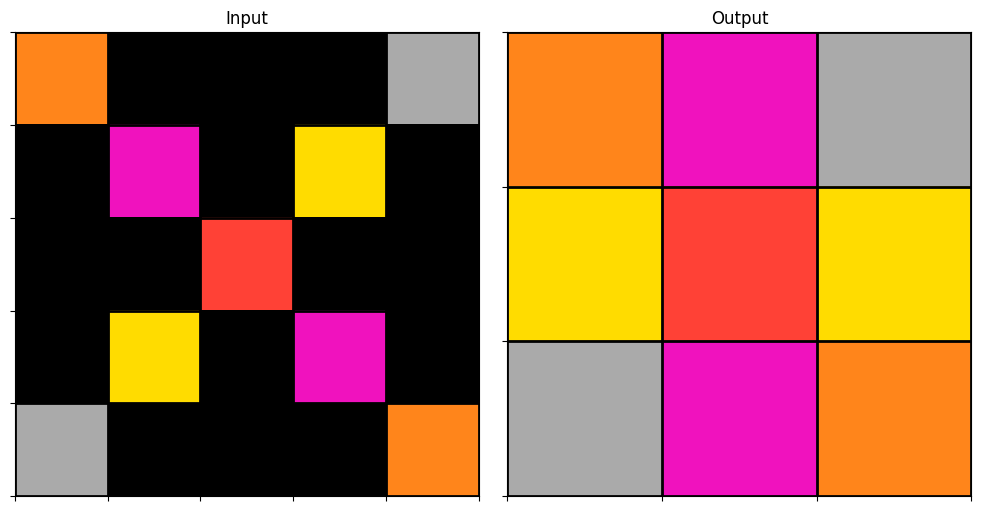

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ARC color palette
color_map = {
    0: '#000000',  # Black
    1: '#0074D9',  # Blue
    2: '#FF4136',  # Red
    3: '#2ECC40',  # Green
    4: '#FFDC00',  # Yellow
    5: '#AAAAAA',  # Gray
    6: '#F012BE',  # Fuchsia
    7: '#FF851B',  # Orange
    8: '#7FDBFF',  # Teal
    9: '#870C25'  # Brown
}

def _hex_to_rgb(hex_color):
    """Convert hex color to RGB values (0-1)"""
    hex_color = hex_color.lstrip('#')
    return [int(hex_color[i:i+2], 16)/255.0 for i in (0, 2, 4)]

def plot_grid(grid, title="", ax=None):
    """Plot a single grid"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))

    # Convert grid to numpy array
    grid_array = np.array(grid)

    # Create colored grid
    colored_grid = np.zeros((grid_array.shape[0], grid_array.shape[1], 3))
    for val in np.unique(grid_array):
        mask = grid_array == val
        color_rgb = _hex_to_rgb(color_map[val])
        colored_grid[mask] = color_rgb

    ax.imshow(colored_grid, interpolation='nearest')
    ax.set_title(title)
    ax.grid(True, which='major', color='black', linewidth=2)
    ax.set_xticks(np.arange(-0.5, grid_array.shape[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_array.shape[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    return ax

def visualize_pair(example):
    """Visualize a single input/output pair from an example dictionary"""
    input_grid = example['input']
    output_grid = example['output']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    plot_grid(input_grid, "Input", ax1)
    plot_grid(output_grid, "Output", ax2)

    plt.tight_layout()
    plt.show()

# Example usage with your data
example = {
    'input': [[7, 0, 0, 0, 5], [0, 6, 0, 4, 0], [0, 0, 2, 0, 0], [0, 4, 0, 6, 0], [5, 0, 0, 0, 7]],
    'output': [[7, 6, 5], [4, 2, 4], [5, 6, 7]]
}

# Visualize the example
visualize_pair(example)

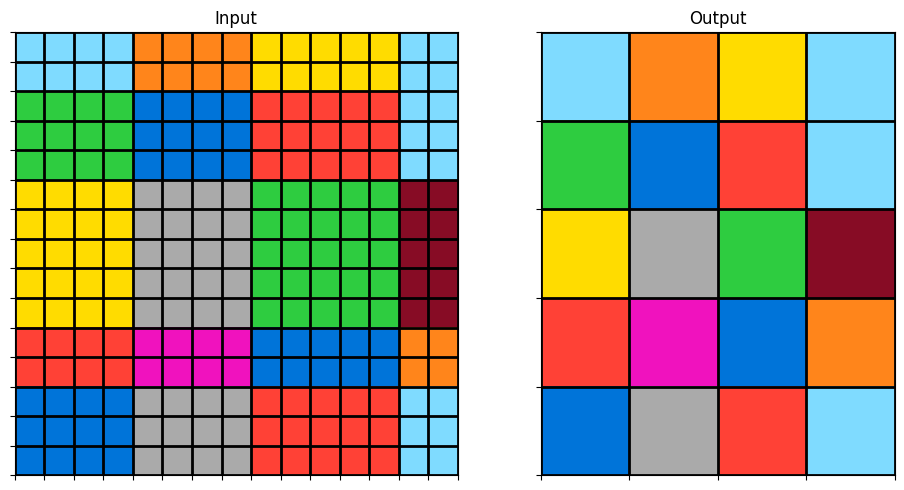

In [ ]:
example = {
    'input': [[8, 8, 8, 8, 7, 7, 7, 7, 4, 4, 4, 4, 4, 8, 8], [8, 8, 8, 8, 7, 7, 7, 7, 4, 4, 4, 4, 4, 8, 8], [3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 8, 8], [3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 8, 8], [3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 8, 8], [4, 4, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3, 3, 9, 9], [4, 4, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3, 3, 9, 9], [4, 4, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3, 3, 9, 9], [4, 4, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3, 3, 9, 9], [4, 4, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3, 3, 9, 9], [2, 2, 2, 2, 6, 6, 6, 6, 1, 1, 1, 1, 1, 7, 7], [2, 2, 2, 2, 6, 6, 6, 6, 1, 1, 1, 1, 1, 7, 7], [1, 1, 1, 1, 5, 5, 5, 5, 2, 2, 2, 2, 2, 8, 8], [1, 1, 1, 1, 5, 5, 5, 5, 2, 2, 2, 2, 2, 8, 8], [1, 1, 1, 1, 5, 5, 5, 5, 2, 2, 2, 2, 2, 8, 8]],
    'output': [[8, 7, 4, 8], [3, 1, 2, 8], [4, 5, 3, 9], [2, 6, 1, 7], [1, 5, 2, 8]]
}
visualize_pair(example)

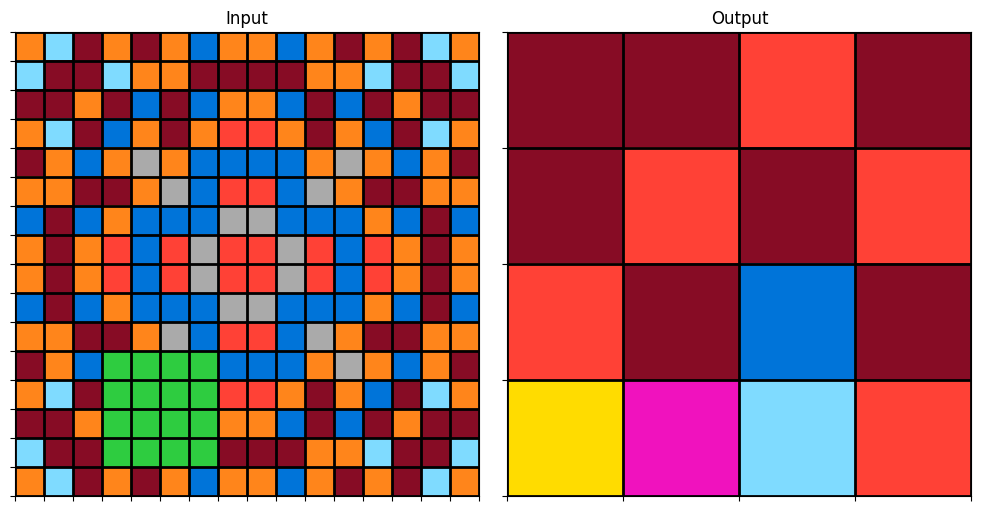

In [ ]:
example = {
    'input': [[7, 8, 9, 7, 9, 7, 1, 7, 7, 1, 7, 9, 7, 9, 8, 7], [8, 9, 9, 8, 7, 7, 9, 9, 9, 9, 7, 7, 8, 9, 9, 8], [9, 9, 7, 9, 1, 9, 1, 7, 7, 1, 9, 1, 9, 7, 9, 9], [7, 8, 9, 1, 7, 9, 7, 2, 2, 7, 9, 7, 1, 9, 8, 7], [9, 7, 1, 7, 5, 7, 1, 1, 1, 1, 7, 5, 7, 1, 7, 9], [7, 7, 9, 9, 7, 5, 1, 2, 2, 1, 5, 7, 9, 9, 7, 7], [1, 9, 1, 7, 1, 1, 1, 5, 5, 1, 1, 1, 7, 1, 9, 1], [7, 9, 7, 2, 1, 2, 5, 2, 2, 5, 2, 1, 2, 7, 9, 7], [7, 9, 7, 2, 1, 2, 5, 2, 2, 5, 2, 1, 2, 7, 9, 7], [1, 9, 1, 7, 1, 1, 1, 5, 5, 1, 1, 1, 7, 1, 9, 1], [7, 7, 9, 9, 7, 5, 1, 2, 2, 1, 5, 7, 9, 9, 7, 7], [9, 7, 1, 3, 3, 3, 3, 1, 1, 1, 7, 5, 7, 1, 7, 9], [7, 8, 9, 3, 3, 3, 3, 2, 2, 7, 9, 7, 1, 9, 8, 7], [9, 9, 7, 3, 3, 3, 3, 7, 7, 1, 9, 1, 9, 7, 9, 9], [8, 9, 9, 3, 3, 3, 3, 9, 9, 9, 7, 7, 8, 9, 9, 8], [7, 8, 9, 7, 9, 7, 1, 7, 7, 1, 7, 9, 7, 9, 8, 7]],
    'output': [[
    9,
    9,
    2,
    9
  ],
  [
    9,
    2,
    9,
    2
  ],
  [
    2,
    9,
    1,
    9
  ],
  [
    4,
    6,
    8,
    2
  ]
]
}
visualize_pair(example)

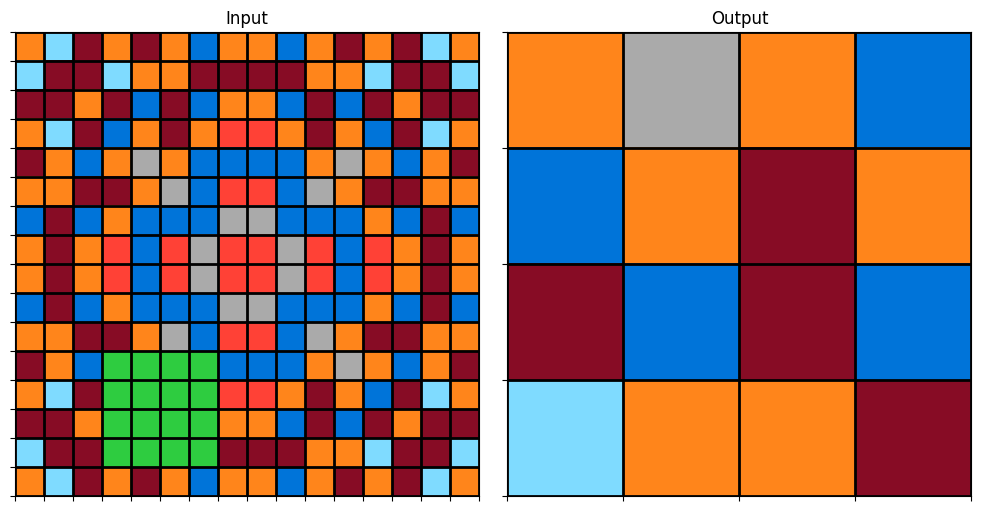

In [ ]:
example = {
    'input': [[7, 8, 9, 7, 9, 7, 1, 7, 7, 1, 7, 9, 7, 9, 8, 7], [8, 9, 9, 8, 7, 7, 9, 9, 9, 9, 7, 7, 8, 9, 9, 8], [9, 9, 7, 9, 1, 9, 1, 7, 7, 1, 9, 1, 9, 7, 9, 9], [7, 8, 9, 1, 7, 9, 7, 2, 2, 7, 9, 7, 1, 9, 8, 7], [9, 7, 1, 7, 5, 7, 1, 1, 1, 1, 7, 5, 7, 1, 7, 9], [7, 7, 9, 9, 7, 5, 1, 2, 2, 1, 5, 7, 9, 9, 7, 7], [1, 9, 1, 7, 1, 1, 1, 5, 5, 1, 1, 1, 7, 1, 9, 1], [7, 9, 7, 2, 1, 2, 5, 2, 2, 5, 2, 1, 2, 7, 9, 7], [7, 9, 7, 2, 1, 2, 5, 2, 2, 5, 2, 1, 2, 7, 9, 7], [1, 9, 1, 7, 1, 1, 1, 5, 5, 1, 1, 1, 7, 1, 9, 1], [7, 7, 9, 9, 7, 5, 1, 2, 2, 1, 5, 7, 9, 9, 7, 7], [9, 7, 1, 3, 3, 3, 3, 1, 1, 1, 7, 5, 7, 1, 7, 9], [7, 8, 9, 3, 3, 3, 3, 2, 2, 7, 9, 7, 1, 9, 8, 7], [9, 9, 7, 3, 3, 3, 3, 7, 7, 1, 9, 1, 9, 7, 9, 9], [8, 9, 9, 3, 3, 3, 3, 9, 9, 9, 7, 7, 8, 9, 9, 8], [7, 8, 9, 7, 9, 7, 1, 7, 7, 1, 7, 9, 7, 9, 8, 7]],
    'output': [[7, 5, 7, 1], [1, 7, 9, 7], [9, 1, 9, 1], [8, 7, 7, 9]]
}
visualize_pair(example)

In [ ]:
[[0, 0, 6, 6, 6, 6, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 6, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 6, 6, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

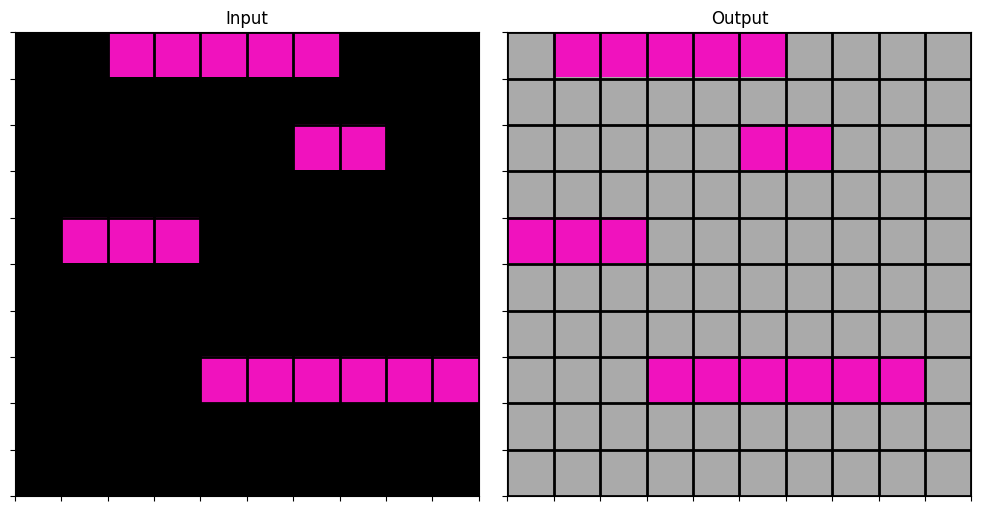

In [ ]:
example = {
    'input': [[0, 0, 6, 6, 6, 6, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 6, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 6, 6, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
    'output': [[5, 6, 6, 6, 6, 6, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 6, 6, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [6, 6, 6, 5, 5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 5, 5, 6, 6, 6, 6, 6, 6, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]
}
visualize_pair(example)

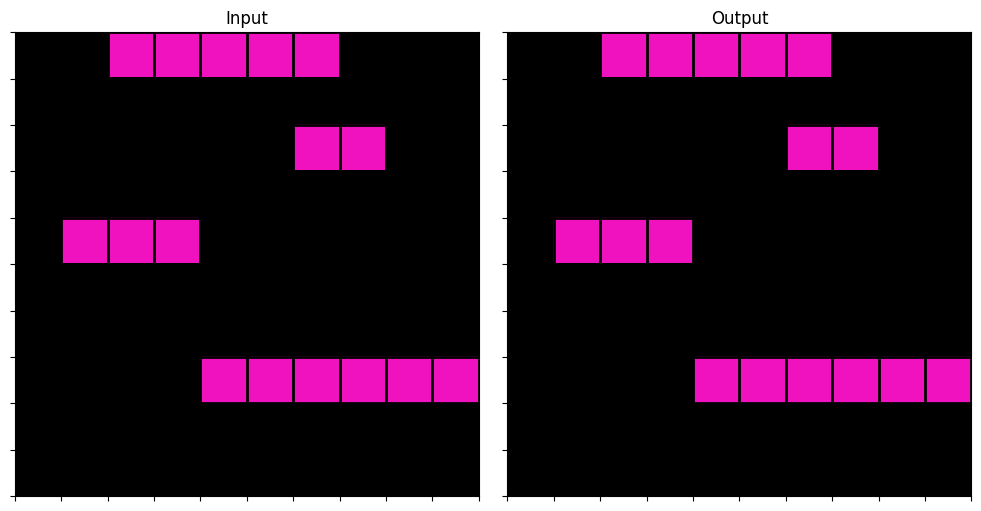

In [ ]:
example = {
    'input': [[0, 0, 6, 6, 6, 6, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 6, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 6, 6, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
    'output': [
  [
    0,
    0,
    6,
    6,
    6,
    6,
    6,
    0,
    0,
    0
  ],
  [
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    0,
    0,
    0,
    0,
    0,
    6,
    6,
    0,
    0
  ],
  [
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    6,
    6,
    6,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    0,
    0,
    0,
    6,
    6,
    6,
    6,
    6,
    6
  ],
  [
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ]
]
}
visualize_pair(example)